In [1]:
%load_ext autoreload
import datetime
# import ete3
import itertools
# import json
import logging
import math
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pm4py
import typing
# import re
import xml.etree.ElementTree as ET
# import xml.dom.minidom
# import xmlschema

In [2]:
%autoreload
from maxes.xes_loader2 import XesLoader, XesLog
# from maxes.xes_file import XesFile
# from maxes.analyze_xes import AnalyzeXes
# import maxes.analyze_sequence
# import maxes.serialization.serialize
# import maxes.graphs
import maxes.notebooks.utils
import maxes.utils

Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [3]:
maxes.notebooks.utils.init_notebook() # RUN ONLY ONCE

Loading config from: C:\vt\md\maxes\maxes\config.local.yml
Config:
{'project_directory_path': '/vt/md/maxes/maxes', 'data_directory_path': '/vt/md/maxes/maxes/data'}


In [4]:
from maxes.notebooks.utils import get_data_path

log = pm4py.read_xes(get_data_path("other/simple.xes"))
log

parsing log, completed traces ::   0%|          | 0/3512 [00:00<?, ?it/s]

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,case:concept:name,case:description,location,duration,outcome
0,Brisbane,customer,1970-01-01 01:00:00+00:00,complete,incoming claim,0,Simulated process instance,NaN,NaN,NaN
1,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:00+00:00,start,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,complete,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
3,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,start,B register claim,0,Simulated process instance,NaN,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 01:12:59+00:00,complete,B register claim,0,Simulated process instance,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
46133,NaN,Call Centre Agent Sydney,1970-01-01 03:39:31+00:00,complete,S register claim,999,Simulated process instance,NaN,NaN,NaN
46134,NaN,Claims handler,1970-01-01 07:56:04+00:00,start,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN
46135,NaN,Claims handler,1970-01-01 07:56:35+00:00,complete,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN
46136,NaN,Claims handler,1970-01-01 07:56:35+00:00,start,end,999,Simulated process instance,NaN,17306,not liable


pandas.core.frame.DataFrame

In [5]:
net, im, fm = pm4py.discover_petri_net_inductive(log)
net

places: [ p_10, p_11, p_13, p_14, p_15, p_17, p_18, p_20, p_21, p_22, p_23, p_25, p_26, p_27, p_31, p_32, p_37, p_38, p_4, p_40, p_41, p_43, p_44, p_5, p_6, p_7, p_8, sink, source ]
transitions: [ (0b8ffd9a-dc6a-408c-a964-b2fc9d0054f4, 'S check if sufficient information is available'), (274028d9-e423-413a-8fd3-9aa1cc2dcca3, 'determine likelihood of claim'), (2a09e6bf-57c1-4ed3-a4ab-c45c6ca155cd, 'close claim'), (315d99fa-b3f4-424b-b7a4-7d765ff9eec6, 'B register claim'), (3aef53a3-3bc7-4cbe-8df8-95cfe4b9b6a5, 'initiate payment'), (545088da-72d2-49a3-9003-443413cd9bae, 'B check if sufficient information is available'), (6ecd5d24-b987-4da1-97fc-e0ae591e7520, 'incoming claim'), (8a3204a7-2c54-4a6c-b893-e22a8bf7065f, 'advise claimant on reimbursement'), (917c7ca1-1c57-4b97-abde-4542a2efc757, 'end'), (bf9bbf7b-9244-4c0e-be2b-c0f094a6bb02, 'assess claim'), (f197e5c1-44e5-43f0-b107-7248f4a2e67d, 'S register claim'), (init_loop_11, None), (init_loop_16, None), (init_loop_2, None), (init_loop_21

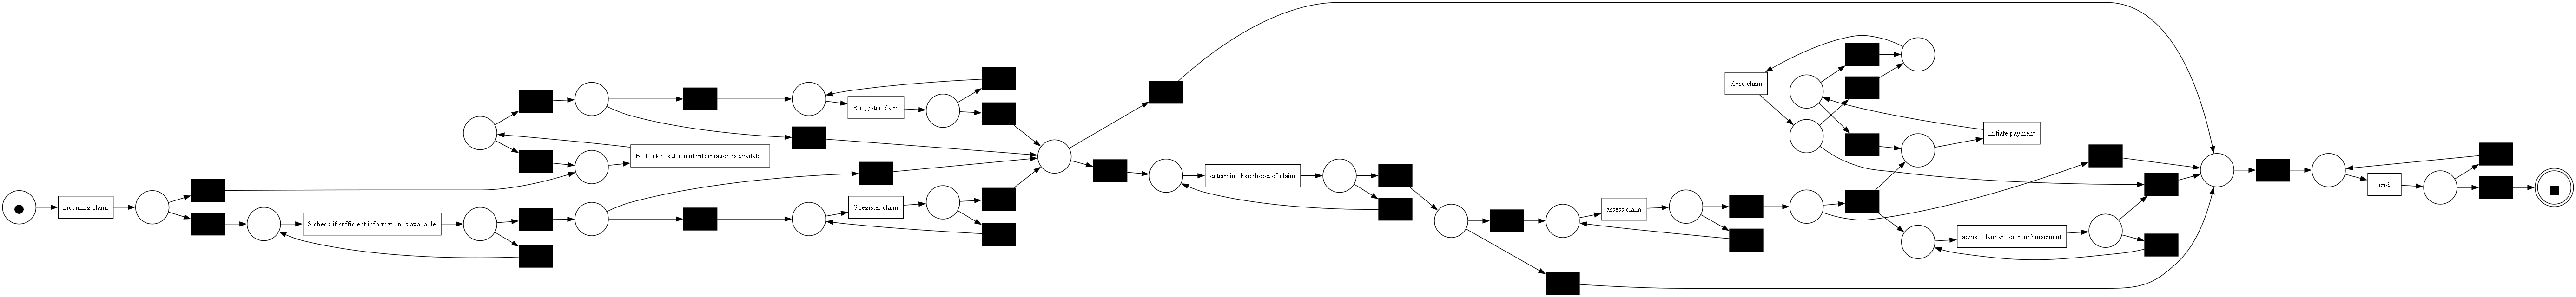

In [6]:
# list(net.places)[0]

# pm4py.objects.petri_net.obj.PetriNet.Place

# fm.__class__
# pm4py.objects.petri_net.obj.Marking

pm4py.view_petri_net(net, im, fm)

In [ ]:
import os
os.environ["PATH"].split(';')

In [8]:
filtered_log = log[log["lifecycle:transition"] == "complete"]
filtered_log

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,case:concept:name,case:description,location,duration,outcome
0,Brisbane,customer,1970-01-01 01:00:00+00:00,complete,incoming claim,0,Simulated process instance,NaN,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,complete,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 01:12:59+00:00,complete,B register claim,0,Simulated process instance,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 01:47:12+00:00,complete,determine likelihood of claim,0,Simulated process instance,NaN,NaN,NaN
8,NaN,Claims handler,1970-01-01 01:47:12+00:00,complete,end,0,Simulated process instance,NaN,2832,not liable
...,...,...,...,...,...,...,...,...,...,...
46129,Sydney,customer,1970-01-01 03:08:09+00:00,complete,incoming claim,999,Simulated process instance,NaN,NaN,NaN
46131,NaN,Call Centre Agent Sydney,1970-01-01 03:35:38+00:00,complete,S check if sufficient information is available,999,Simulated process instance,Sydney,NaN,NaN
46133,NaN,Call Centre Agent Sydney,1970-01-01 03:39:31+00:00,complete,S register claim,999,Simulated process instance,NaN,NaN,NaN
46135,NaN,Claims handler,1970-01-01 07:56:35+00:00,complete,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN


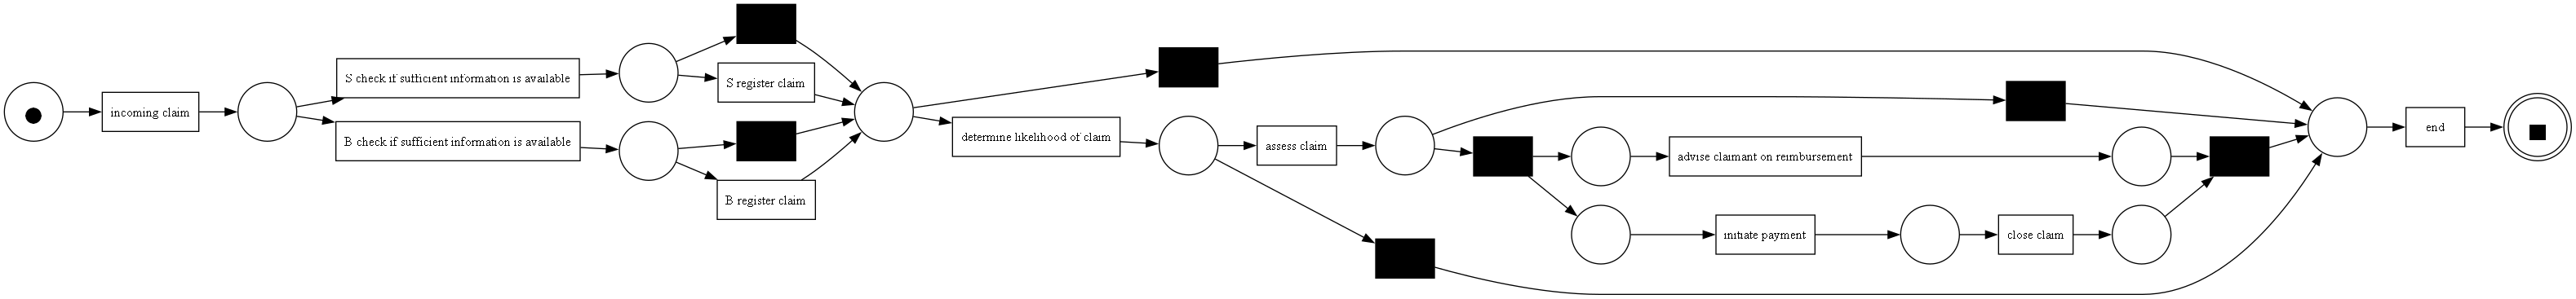

replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Generalization: 0.969930349495639


replaying log with TBR, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision:  0.8629916251457649


computing precision with alignments, completed variants ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision (Alignment-based):  0.8629916251457649
Precision (Alignment-based):  0.8333333333333334


C:\Users\Maksim\AppData\Local\Temp\ipykernel_15664\3212577479.py:11: DeprecatedWarning: precision_footprints is deprecated as of 2.3.0 and will be removed in 3.0.0. conformance checking using footprints will not be exposed in a future release
  print("Precision (Alignment-based): ", pm4py.conformance.precision_footprints(filtered_log, net, im, fm))


In [ ]:
net, im, fm = pm4py.discover_petri_net_inductive(filtered_log)

pm4py.view_petri_net(net, im, fm)

print("Fitness: ", pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm))
print("Generalization:", pm4py.conformance.generalization_tbr(filtered_log, net, im, fm))
print("Precision: ", pm4py.conformance.precision_token_based_replay(filtered_log, net, im, fm))
print("Precision (Alignment-based): ", pm4py.conformance.precision_alignments(filtered_log, net, im, fm))

In [60]:
print(net)
print(im)
print(fm)

places: [ p_10, p_11, p_12, p_13, p_14, p_3, p_4, p_5, p_6, p_7, p_8, p_9, sink, source ]
transitions: [ (1b514e48-af80-4bcb-99b5-d4bc6d16f828, 'S register claim'), (3df1e8de-6f11-4dce-ab62-f41632002fe3, 'advise claimant on reimbursement'), (8fabc0ff-672e-450e-8887-d5381f2df7ef, 'close claim'), (ac606db2-c9ba-417e-9193-63dab7536450, 'initiate payment'), (b0f84788-56f7-4808-9c3f-360ed0eee2df, 'end'), (c0f7257f-4bcb-4dca-819c-aa50a6820359, 'determine likelihood of claim'), (cca9d851-8b07-45b2-8a34-eab09f860558, 'B register claim'), (cf37676a-3ee0-4a44-9291-731f940d9391, 'S check if sufficient information is available'), (ec9745bb-eacd-453c-ab36-1e999ede189a, 'assess claim'), (f4faa8bc-4933-4a9e-88f6-38dd2c3b165b, 'B check if sufficient information is available'), (fb3fb4f0-0a2a-4dbd-8e57-019c72ddb4cb, 'incoming claim'), (skip_1, None), (skip_2, None), (skip_3, None), (skip_4, None), (skip_5, None), (tauJoin_7, None), (tauSplit_6, None) ]
arcs: [ (1b514e48-af80-4bcb-99b5-d4bc6d16f828, 'S 

In [77]:
pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm)


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

In [115]:
# for place in net.places:
#     print(place.properties)

net.properties

{}

In [107]:
pm4py.conformance.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm)


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

[{'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(6d112ed9-cf52-4f48-9a46-a9d1150ad027, 'incoming claim'),
   (f9dc2450-6bdd-416c-856a-4fddd9c38eef, 'B check if sufficient information is available'),
   (3dc552f1-56e0-4068-987b-6a706a127e27, 'B register claim'),
   (49349f12-557c-4767-ab3c-5f3b20cf89b0, 'determine likelihood of claim'),
   (skip_4, None),
   (48efa6f5-da69-4aed-909c-cf71ad62c910, 'end')],
  'reached_marking': ['sink:1'],
  'enabled_transitions_in_marking': set(),
  'transitions_with_problems': [],
  'missing_tokens': 0,
  'consumed_tokens': 7,
  'remaining_tokens': 0,
  'produced_tokens': 7},
 {'trace_is_fit': True,
  'trace_fitness': 1.0,
  'activated_transitions': [(6d112ed9-cf52-4f48-9a46-a9d1150ad027, 'incoming claim'),
   (6b979412-ec49-4dfc-93dc-518d0fe8d873, 'S check if sufficient information is available'),
   (4816bfef-cb30-4fdf-87ff-da728a66dc6a, 'S register claim'),
   (49349f12-557c-4767-ab3c-5f3b20cf89b0, 'determine likelihood of

In [44]:
im.__class__

pm4py.objects.petri_net.obj.Marking

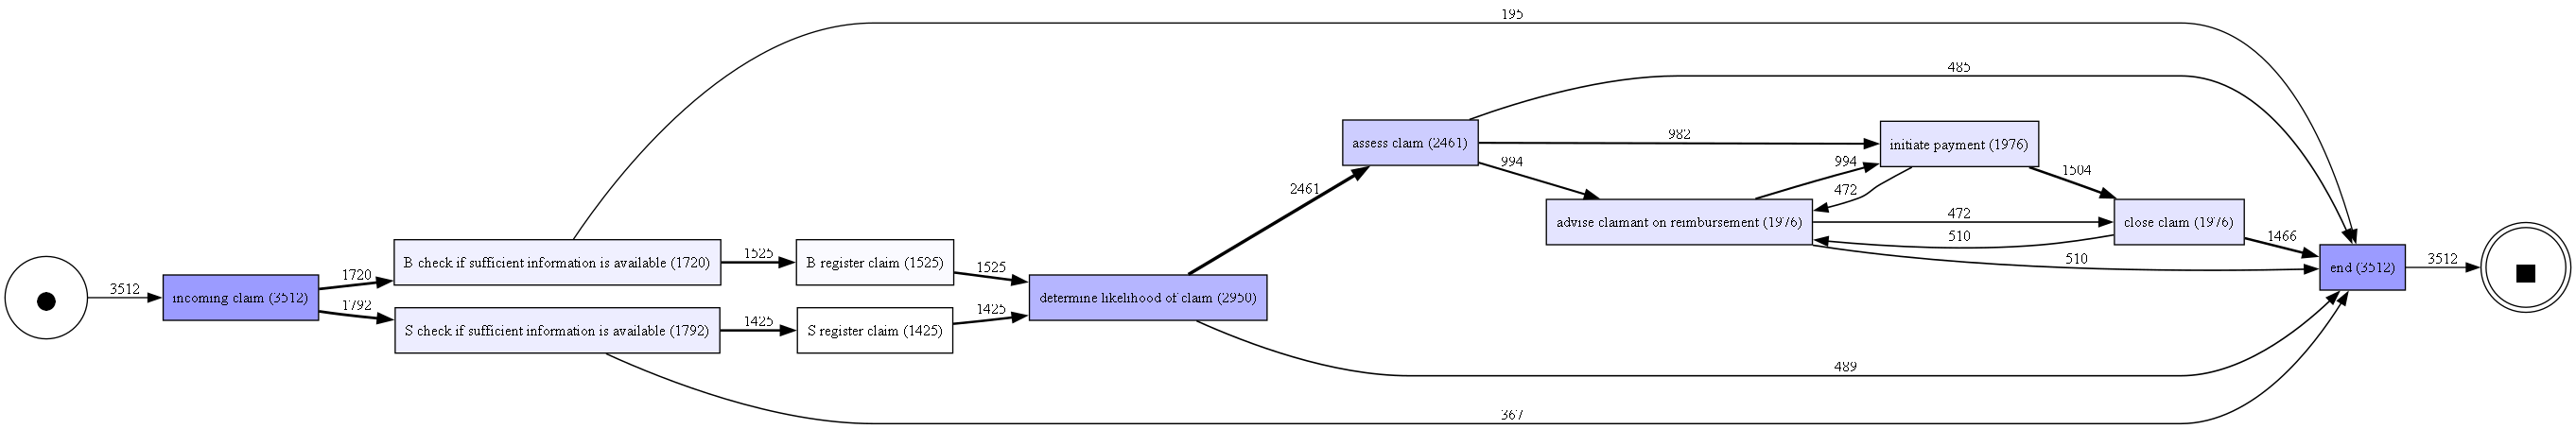

In [23]:
dfg, sa, ea = pm4py.discover_dfg(filtered_log)

pm4py.view_dfg(dfg, sa, ea)

In [19]:
trace = filtered_log[filtered_log["case:concept:name"] == "0"][:4].copy()
trace

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,case:concept:name,case:description,location,duration,outcome
0,Brisbane,customer,1970-01-01 01:00:00+00:00,complete,incoming claim,0,Simulated process instance,NaN,NaN,NaN
2,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,complete,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN
4,NaN,Call Centre Agent Brisbane,1970-01-01 01:12:59+00:00,complete,B register claim,0,Simulated process instance,NaN,NaN,NaN
6,NaN,Claims handler,1970-01-01 01:47:12+00:00,complete,determine likelihood of claim,0,Simulated process instance,NaN,NaN,NaN


In [20]:
pm4py.conformance.fitness_token_based_replay(trace, net, im, fm)

{'perc_fit_traces': 0.0,
 'average_trace_fitness': 0.8,
 'log_fitness': 0.8,
 'percentage_of_fitting_traces': 0.0}

In [21]:
pm4py.algo.conformance.alignments.petri_net.algorithm.apply(trace, net, im, fm)

[{'alignment': [('incoming claim', 'incoming claim'),
   ('B check if sufficient information is available',
    'B check if sufficient information is available'),
   ('B register claim', 'B register claim'),
   ('determine likelihood of claim', 'determine likelihood of claim'),
   ('>>', None),
   ('>>', 'end')],
  'cost': 10001,
  'visited_states': 6,
  'queued_states': 18,
  'traversed_arcs': 18,
  'lp_solved': 12,
  'fitness': 0.8571428571428572,
  'bwc': 70002}]

In [31]:
net

places: [ A, B, C ]
transitions: [  ]
arcs: [  ]

In [51]:
list(im.keys())[0]

source

In [52]:
net

places: [ p_10, p_11, p_12, p_13, p_14, p_3, p_4, p_5, p_6, p_7, p_8, p_9, sink, source ]
transitions: [ (03c4e8f2-a095-402b-9bf3-486b0a45f6d3, 'close claim'), (1cdabebd-c166-4bbb-bbaf-2a2a58b23f10, 'assess claim'), (21a92824-4207-4539-9e70-2b2494178ab6, 'advise claimant on reimbursement'), (28493056-b216-4ef3-84f1-9f075159e77d, 'end'), (333d61b5-75a0-48f8-919b-c907022abcb3, 'S register claim'), (4411c17f-9de7-4900-a52b-4213a8dc1373, 'incoming claim'), (6a8485f4-344f-473a-b464-da1f1f8640d1, 'B check if sufficient information is available'), (8c7a4c62-0552-42c6-aaa2-3991ae1e9267, 'initiate payment'), (a53a2f00-47f1-46f4-9d23-cb097c9347d2, 'B register claim'), (c258ea5b-08c1-40db-b3b5-fb8b81906901, 'determine likelihood of claim'), (fe8966b7-666a-4d3e-8a8b-9bd9b5500d73, 'S check if sufficient information is available'), (skip_1, None), (skip_2, None), (skip_3, None), (skip_4, None), (skip_5, None), (tauJoin_7, None), (tauSplit_6, None) ]
arcs: [ (03c4e8f2-a095-402b-9bf3-486b0a45f6d3, 'cl

In [53]:
log["concept:name"].unique()

array(['incoming claim', 'B check if sufficient information is available',
       'B register claim', 'determine likelihood of claim', 'end',
       'S check if sufficient information is available',
       'S register claim', 'assess claim',
       'advise claimant on reimbursement', 'initiate payment',
       'close claim'], dtype=object)

In [72]:
first_last_df = filtered_log.groupby("case:concept:name").agg(["first", "last"])["concept:name"]
first_events = first_last_df["first"].unique()
print(first_events)

last_events = first_last_df["last"].unique()
print(last_events)

['incoming claim']
['end']


places: [ center, sink, source ]
transitions: [ (0e961f14-35d7-4c61-b91b-415b4cc1c9c1, 'close claim'), (301c99db-b17d-4733-a4aa-bcae1ed88dd9, 'initiate payment'), (553833c0-e7de-4874-abd0-80f8de4bdd79, 'end'), (5cac19cf-36b5-4796-812d-9991ad4961b8, 'B check if sufficient information is available'), (9103322e-76ad-41a5-9710-1d816ddb3c4c, 'advise claimant on reimbursement'), (9f9c5a41-fb4b-4e83-b90d-f1768daef660, 'S register claim'), (a2db2018-01a1-414a-a03c-b62d4682c2c7, 'assess claim'), (a583d998-7c02-4e29-9910-0c22c66f2c3c, 'B register claim'), (cb25c024-f0bc-4e4e-8377-88e1a2044249, 'determine likelihood of claim'), (e32c6fed-afcf-43ab-8105-aaf618acdd81, 'S check if sufficient information is available'), (ee0c5923-6b2c-49f2-ab50-36f116ff9e03, 'incoming claim'), (skip_1, None), (skip_2, None) ]
arcs: [ (0e961f14-35d7-4c61-b91b-415b4cc1c9c1, 'close claim')->center, (301c99db-b17d-4733-a4aa-bcae1ed88dd9, 'initiate payment')->center, (553833c0-e7de-4874-abd0-80f8de4bdd79, 'end')->center, 

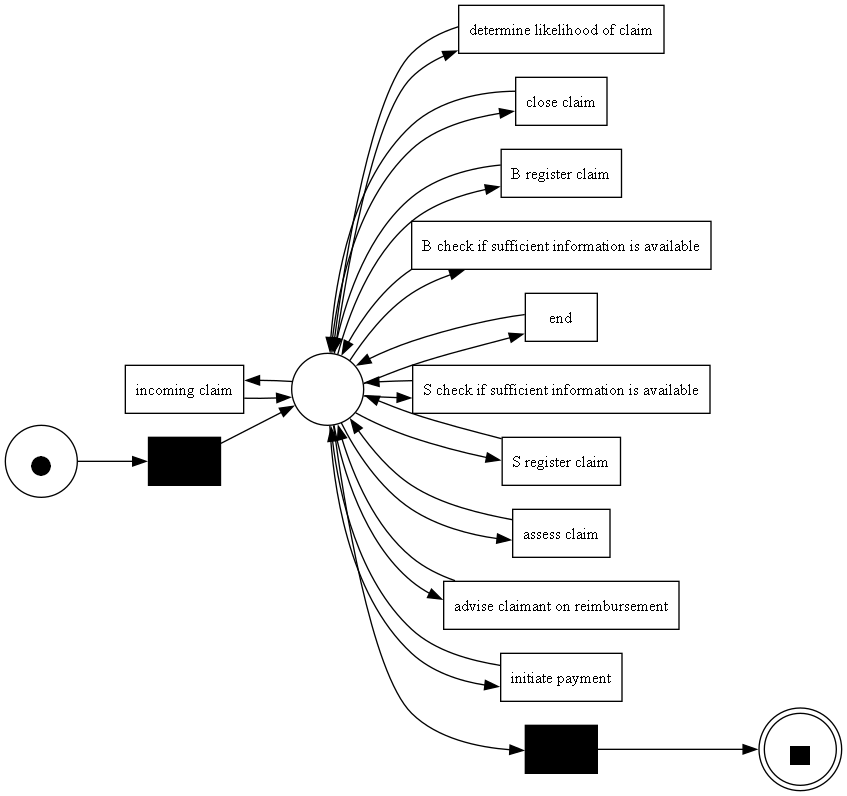

replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Generalization: 0.9789702148677155


replaying log with TBR, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision:  0.14905428911471208


In [153]:
import uuid

def add_arc(
        net: pm4py.objects.petri_net.obj.PetriNet,
        source: any,
        destination: any) -> pm4py.objects.petri_net.obj.PetriNet.Arc:
    arc = net.Arc(source, destination)

    net.arcs.add(arc)
    source.out_arcs.add(arc)
    destination.in_arcs.add(arc)

    return arc

def create_generalizing_petri_net(log: pd.DataFrame):
    net = pm4py.PetriNet("X")

    source = net.Place("source")
    net.places.add(source)

    center = net.Place("center")
    net.places.add(center)

    sink = net.Place("sink")
    net.places.add(sink)

    # source -> skip -> center
    skip_1 = net.Transition(name="skip_1")
    net.transitions.add(skip_1)
    add_arc(net, source=source, destination=skip_1)
    add_arc(net, source=skip_1, destination=center)

    # center -> skip -> sink
    skip_2 = net.Transition(name="skip_2")
    net.transitions.add(skip_2)
    add_arc(net, source=center, destination=skip_2)
    add_arc(net, source=skip_2, destination=sink)

    # center <-> event (transition)
    for index, event in enumerate(log["concept:name"].unique()):
        transition = net.Transition(
            name=str(uuid.uuid4()),
            label=event
        )
        net.transitions.add(transition)

        add_arc(net, source=center, destination=transition)
        add_arc(net, source=transition, destination=center)

    # first_last_df = log.groupby("case:concept:name").agg(["first", "last"])["concept:name"]

    # # Connect source (place) -> first event (transition)
    # first_events = first_last_df["first"].unique()

    # for event in first_events:
    #     transition = next(transition for transition in net.transitions if transition.label == event)
    #     add_arc(net, source=source, destination=transition)

    # # Connect last event (transition) -> sink (place)
    # last_events = first_last_df["last"].unique()

    # for event in last_events:
    #     transition = next(transition for transition in net.transitions if transition.label == event)
    #     add_arc(net, source=transition, destination=sink)

    im = pm4py.objects.petri_net.obj.Marking([source])
    fm = pm4py.objects.petri_net.obj.Marking([sink])

    return net, im, fm

net, im, fm = create_generalizing_petri_net(filtered_log)

print(net)
print(im)
print(fm)

pm4py.view_petri_net(net, im, fm)

print("Fitness: ", pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm))
# print("Fitness (Alignment-based): ", pm4py.conformance.fitness_alignments(filtered_log, net, im, fm))
print("Generalization:", pm4py.conformance.generalization_tbr(filtered_log, net, im, fm))
print("Precision: ", pm4py.conformance.precision_token_based_replay(filtered_log, net, im, fm))
# print("Precision (Alignment-based): ", pm4py.conformance.precision_alignments(filtered_log, net, im, fm))

In [102]:
list(net.places)[0].out_arcs

{source->(425216c6-2f6d-4080-a3d4-7bd525eef49d, 'incoming claim')}

In [100]:
list(net.transitions)[0].out_arcs

{(425216c6-2f6d-4080-a3d4-7bd525eef49d, 'incoming claim')->center}

In [75]:
filtered_log

,call centre,org:resource,time:timestamp,lifecycle:transition,concept:name,case:concept:name,case:description,location,duration,outcome,start_timestamp
0,Brisbane,customer,1970-01-01 01:00:00+00:00,complete,incoming claim,0,Simulated process instance,NaN,NaN,NaN,1970-01-01 01:00:00+00:00
2,NaN,Call Centre Agent Brisbane,1970-01-01 01:00:41+00:00,complete,B check if sufficient information is available,0,Simulated process instance,Brisbane,NaN,NaN,1970-01-01 01:00:41+00:00
4,NaN,Call Centre Agent Brisbane,1970-01-01 01:12:59+00:00,complete,B register claim,0,Simulated process instance,NaN,NaN,NaN,1970-01-01 01:12:59+00:00
6,NaN,Claims handler,1970-01-01 01:47:12+00:00,complete,determine likelihood of claim,0,Simulated process instance,NaN,NaN,NaN,1970-01-01 01:47:12+00:00
8,NaN,Claims handler,1970-01-01 01:47:12+00:00,complete,end,0,Simulated process instance,NaN,2832,not liable,1970-01-01 01:47:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...
46129,Sydney,customer,1970-01-01 03:08:09+00:00,complete,incoming claim,999,Simulated process instance,NaN,NaN,NaN,1970-01-01 03:08:09+00:00
46131,NaN,Call Centre Agent Sydney,1970-01-01 03:35:38+00:00,complete,S check if sufficient information is available,999,Simulated process instance,Sydney,NaN,NaN,1970-01-01 03:35:38+00:00
46133,NaN,Call Centre Agent Sydney,1970-01-01 03:39:31+00:00,complete,S register claim,999,Simulated process instance,NaN,NaN,NaN,1970-01-01 03:39:31+00:00
46135,NaN,Claims handler,1970-01-01 07:56:35+00:00,complete,determine likelihood of claim,999,Simulated process instance,NaN,NaN,NaN,1970-01-01 07:56:35+00:00


In [104]:
print("Fitness: ", pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm))
print("Generalization:", pm4py.conformance.generalization_tbr(filtered_log, net, im, fm))
print("Precision: ", pm4py.conformance.precision_token_based_replay(filtered_log, net, im, fm))


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 0.0, 'average_trace_fitness': 0.8796929081738306, 'log_fitness': 0.889729661841816, 'percentage_of_fitting_traces': 0.0}


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Generalization: 0.9782146507848585


replaying log with TBR, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision:  1.0


In [105]:
pm4py.conformance.conformance_diagnostics_token_based_replay(filtered_log, net, im, fm)

replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

[{'trace_is_fit': False,
  'trace_fitness': 0.8571428571428572,
  'activated_transitions': [(ef3728f9-6ecf-4cc7-8bde-6ba4a1d442e2, 'incoming claim'),
   (dff5aaa7-e2ac-40bd-aa17-bcde1a572418, 'B check if sufficient information is available'),
   (7354edb6-0c9a-48c0-bed4-53606d143df9, 'B register claim'),
   (63f0b1ee-25db-4dfb-9929-232a8da6aae2, 'determine likelihood of claim'),
   (e4cef886-0af5-445b-8eda-b996765ba382, 'end')],
  'reached_marking': ['center:1', 'sink:1'],
  'enabled_transitions_in_marking': {(03018c2f-7603-4be5-8a8c-87910dda8b60, 'S check if sufficient information is available'),
   (63f0b1ee-25db-4dfb-9929-232a8da6aae2, 'determine likelihood of claim'),
   (68cfbd43-305e-4be0-8111-2a5f56bb52ae, 'initiate payment'),
   (7354edb6-0c9a-48c0-bed4-53606d143df9, 'B register claim'),
   (76cbde75-5397-47e6-8673-fc1cb5b7ce42, 'S register claim'),
   (94b9de06-2764-46b1-b46b-372a283c8556, 'assess claim'),
   (af4a7e44-10c5-489d-9ee9-abf3b04a538e, 'close claim'),
   (ccbb68f0-

In [ ]:
print("Fitness: ", pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm))
print("Generalization:", pm4py.conformance.generalization_tbr(filtered_log, net, im, fm))
print("Precision: ", pm4py.conformance.precision_token_based_replay(filtered_log, net, im, fm))


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 100.0, 'average_trace_fitness': 1.0, 'log_fitness': 1.0, 'percentage_of_fitting_traces': 100.0}


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Generalization: 0.969930349495639


replaying log with TBR, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision:  0.8629916251457649


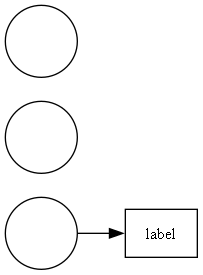

places: [ A, B, C ]
transitions: [ (A to B, 'label') ]
arcs: [ A->(A to B, 'label') ]

In [54]:
net = pm4py.PetriNet("Hello")

a = net.Place("A")
net.places.add(a)
b = net.Place("B")
net.places.add(b)
c = net.Place("C")
net.places.add(c)

t1 = net.Transition("A to B", "label")
net.transitions.add(t1)

net.arcs.add(net.Arc(a, t1))

# pm4py.objects.petri_net.obj.Marking

net

# pm4py.view_petri_net(net, im, fm)
pm4py.view_petri_net(net)

net


In [56]:
from collections import Counter

c = Counter(['a'])
c

Counter({'a': 1})

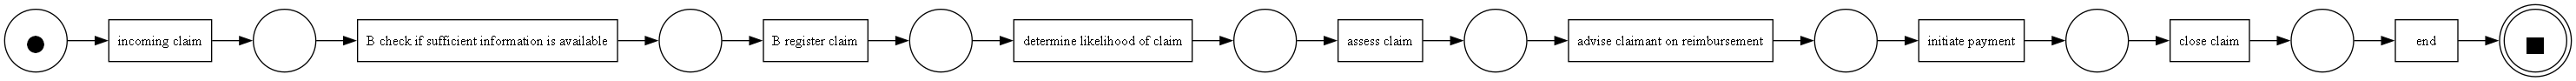

replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness:  {'perc_fit_traces': 14.94874715261959, 'average_trace_fitness': 0.8038910809198395, 'log_fitness': 0.8430334394904458, 'percentage_of_fitting_traces': 14.94874715261959}


aligning log, completed variants ::   0%|          | 0/12 [00:00<?, ?it/s]

Fitness (Alignment-based):  {'percFitTraces': 14.94874715261959, 'averageFitness': 0.7068938243482696, 'percentage_of_fitting_traces': 14.94874715261959, 'average_trace_fitness': 0.7068938243482696, 'log_fitness': 0.7309907323729024}


replaying log with TBR, completed traces ::   0%|          | 0/12 [00:00<?, ?it/s]

Generalization: 0.9789416205930911


replaying log with TBR, completed traces ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision:  0.8198162876666293


computing precision with alignments, completed variants ::   0%|          | 0/25 [00:00<?, ?it/s]

Precision (Alignment-based):  1.0


In [152]:
def find_most_frequent_trace_sequence(log: pd.DataFrame) -> list[str]:
    sequences = []

    for _name, df in filtered_log.groupby("case:concept:name"):
        sequence = tuple(df["concept:name"])
        sequences.append(sequence)

    c = Counter(sequences)
    return c.most_common(1)[0][0]

def generate_most_frequent_trace_petri_net(log: pd.DataFrame):
    sequence = find_most_frequent_trace_sequence(log)

    net = pm4py.PetriNet("X")

    source = net.Place("source")
    net.places.add(source)

    current_place = source

    for index, event in enumerate(sequence):
        transition = net.Transition(
            name=str(uuid.uuid4()),
            label=event
        )
        net.transitions.add(transition)

        add_arc(net, source=current_place, destination=transition)

        current_place = net.Place(f"p_{index}")
        net.places.add(current_place)

        add_arc(net, source=transition, destination=current_place)

    current_place.name = "sink"

    im = pm4py.objects.petri_net.obj.Marking([source])
    fm = pm4py.objects.petri_net.obj.Marking([current_place])

    return net, im, fm

net, im, fm = generate_most_frequent_trace_petri_net(filtered_log)

pm4py.view_petri_net(net, im, fm)

print("Fitness: ", pm4py.conformance.fitness_token_based_replay(filtered_log, net, im, fm))
print("Fitness (Alignment-based): ", pm4py.conformance.fitness_alignments(filtered_log, net, im, fm))
print("Generalization:", pm4py.conformance.generalization_tbr(filtered_log, net, im, fm))
print("Precision: ", pm4py.conformance.precision_token_based_replay(filtered_log, net, im, fm))
print("Precision (Alignment-based): ", pm4py.conformance.precision_alignments(filtered_log, net, im, fm))

In [134]:
sequences = []

for name, df in filtered_log.groupby("case:concept:name"):
    sequence = tuple(df["concept:name"])
    sequences.append(sequence)

c = Counter(sequences)
c

Counter({('incoming claim',
          'B check if sufficient information is available',
          'B register claim',
          'determine likelihood of claim',
          'assess claim',
          'advise claimant on reimbursement',
          'initiate payment',
          'close claim',
          'end'): 525,
         ('incoming claim',
          'S check if sufficient information is available',
          'S register claim',
          'determine likelihood of claim',
          'assess claim',
          'advise claimant on reimbursement',
          'initiate payment',
          'close claim',
          'end'): 469,
         ('incoming claim',
          'S check if sufficient information is available',
          'end'): 367,
         ('incoming claim',
          'S check if sufficient information is available',
          'S register claim',
          'determine likelihood of claim',
          'assess claim',
          'initiate payment',
          'close claim',
          'advise claiman

In [133]:
max(sequences, key=sequences.count)

('incoming claim',
 'B check if sufficient information is available',
 'B register claim',
 'determine likelihood of claim',
 'assess claim',
 'advise claimant on reimbursement',
 'initiate payment',
 'close claim',
 'end')

In [135]:
c.most_common(1)[0][0]

('incoming claim',
 'B check if sufficient information is available',
 'B register claim',
 'determine likelihood of claim',
 'assess claim',
 'advise claimant on reimbursement',
 'initiate payment',
 'close claim',
 'end')